## Homework 5
http://wiki.quantsoftware.org/index.php?title=CompInvesti_Homework_5

In [1]:
from lib import DataAccess as da
from lib import qsdateutil as du
from lib import EventProfiler as ep
from lib import homework_2 as h2
from lib import homework_3 as h3
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

__Get Data:__

In [2]:
dataobj = da.DataAccess('Yahoo')
#date
startdate = dt.datetime(2010, 1, 1) 
enddate = dt.datetime(2010, 12, 31)
dt_timeofday = dt.timedelta(hours=16)
timestamps = du.getNYSEdays(startdate, enddate, dt_timeofday)

#data
symbols =  ['GOOG','VZ']
keys = ['open', 'high', 'low', 'close', 'volume', 'actual_close']
ldf_data = dataobj.get_data(timestamps, symbols, keys)
data = dict(zip(keys, ldf_data))

#remove NAN from price data
for s_key in keys:
    data[s_key] = data[s_key].fillna(method = 'ffill')
    data[s_key] = data[s_key].fillna(method = 'bfill')
    data[s_key] = data[s_key].fillna(1.0)

### Bollinger Bands:

In [5]:
def bollinger_bands(closes, days=20, alpha_std = 2):
    dict_out = dict()
    for symbol in closes:
    
        # Create Dataframe
        df = pd.DataFrame()
        df['price'] = closes[symbol]
        df['average'] = closes[symbol].rolling(window=days, center=False).mean() 
        std = closes[symbol].rolling(window=days,center=False).std()*alpha_std 
        df['std_up'] = df['average']+std
        df['std_down'] = df['average']-std
        df['bollinger_val'] = (df['price'] - df['average']) / (std)
        
        #Operations
        df['op'] = ''
        for i in range(len(df)-1):
            if df['bollinger_val'][i+1]>=1 and df['bollinger_val'][i]<1:
                df['op'].iloc[i+1]= 'Sell'
            elif df['bollinger_val'][i+1]<=-1 and df['bollinger_val'][i]>-1:
                df['op'].iloc[i+1]='Buy'
        
        #plot
        plt.figure(figsize=(15,5))
        plt.title(symbol)
        plt.ylabel('Adjusted Close')
        plt.plot(df.index,df['price'], lw=2)
        plt.plot(df.index,df['std_up'],c='gray')
        plt.plot(df.index,df['std_down'],c='gray')
        plt.fill_between(df.index, df['std_down'], df['std_up'],  facecolor='gray',alpha=0.2)
        #operations lines
        for date in df[df['op']=='Buy'].index:
            plt.axvline(x=date,c='g',alpha=0.2)
        for date in df[df['op']=='Sell'].index:
            plt.axvline(x=date,c='r',alpha=0.2)
        
        #Bollinger plot
        plt.figure(figsize=(15,5))
        plt.title(symbol)
        plt.ylabel('Bollinger Faeture')
        plt.plot(df.index,df['bollinger_val'], lw=2)
        plt.plot(df.index,np.ones(len(df)), c='gray')
        plt.plot(df.index,-np.ones(len(df)), c='gray')
        plt.fill_between(df.index,np.ones(len(df)), -np.ones(len(df)),  facecolor='gray',alpha=0.2)
        #operations lines
        for date in df[df['op']=='Buy'].index:
            plt.axvline(x=date,c='g',alpha=0.2)
        for date in df[df['op']=='Sell'].index:
            plt.axvline(x=date,c='r',alpha=0.2)
        
        
        plt.show()
        dict_out[symbol] = df
    return dict_out

Example:

/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


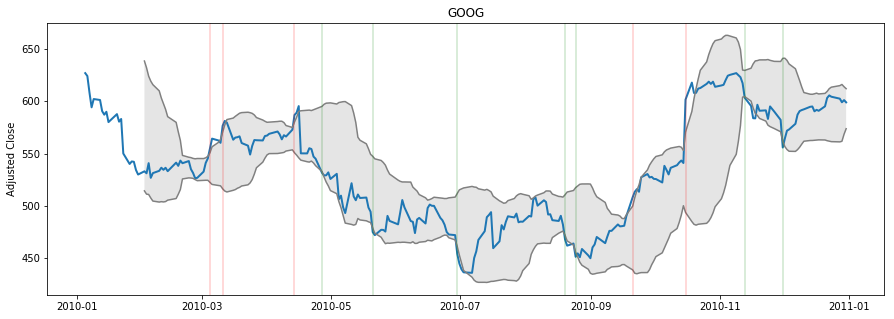

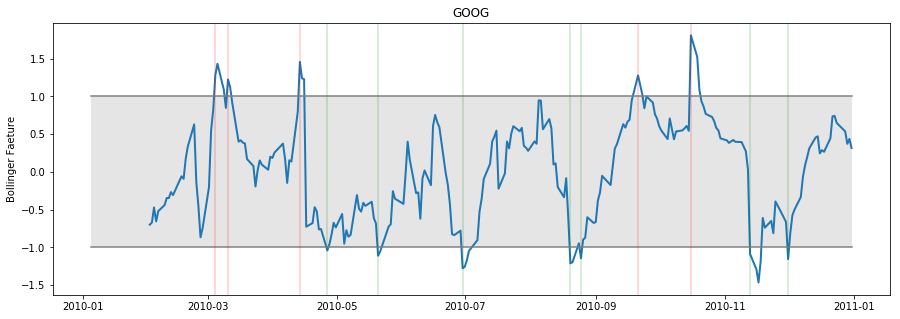

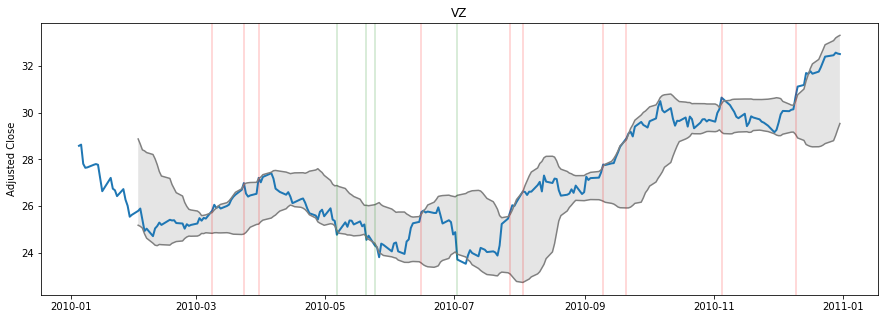

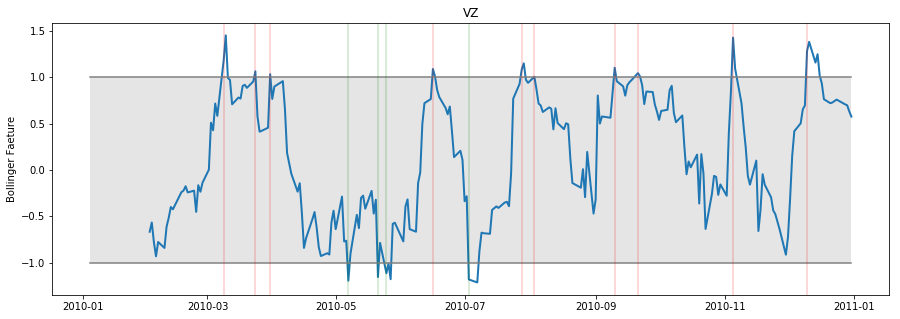

,price,average,std_up,std_down,bollinger_val,op
2010-12-23 16:00:00,604.23,587.3465,613.357562,561.335438,0.649089,
2010-12-27 16:00:00,602.38,587.9655,614.818059,561.112941,0.536802,
2010-12-28 16:00:00,598.92,588.8060,615.937726,561.674274,0.372774,
2010-12-29 16:00:00,601.00,591.0705,613.769488,568.371512,0.437442,
2010-12-30 16:00:00,598.86,592.7960,611.905400,573.686600,0.317331,


In [6]:
bb = bollinger_bands(data['close'])
bb['GOOG'].tail()

### Simple Move Average SMA

In [ ]:
def simple_move_average(closes, days=20):
    dict_out = dict()
    for symbol in closes:
    
        # Create Dataframe
        df = pd.DataFrame()
        df['price'] = closes[symbol]
        df['average'] = closes[symbol].rolling(window=days, center=False).mean() 
        
        #Operations
        df['op'] = ''
        for i in range(len(df)-1):
            if df['price'][i+1]>=df['average'][i+1] and df['price'][i]<df['average'][i]:
                df['op'].iloc[i+1]= 'Buy'
            elif df['price'][i+1]<=df['average'][i+1] and df['price'][i]>df['average'][i]:
                df['op'].iloc[i+1]='Sell'
        
        #plot
        plt.figure(figsize=(15,5))
        plt.title(symbol)
        plt.ylabel('Adjusted Close')
        plt.plot(df.index,df['price'], lw=2)
        plt.plot(df.index,df['average'], lw=2,c='r')
        #operations lines
        for date in df[df['op']=='Buy'].index:
            plt.axvline(x=date,c='g',alpha=0.2)
        for date in df[df['op']=='Sell'].index:
            plt.axvline(x=date,c='r',alpha=0.2)
        
        plt.show()
        dict_out[symbol] = df
    return dict_out

Example:

In [ ]:
bb = simple_move_average(data['close'])
bb['GOOG'].tail()

###  Moving Average Convergence Divergence MACD

In [ ]:
def moving_average_convergence_divergence(closes, days1=30, days2=15):
    dict_out = dict()
    for symbol in closes:
    
        # Create Dataframe
        df = pd.DataFrame()
        df['price'] = closes[symbol]
        df['average1'] = closes[symbol].rolling(window=days1, center=False).mean() 
        df['average2'] = closes[symbol].rolling(window=days2, center=False).mean() 
        df['macd'] = df['average2']-df['average1']
        
        #Operations
        df['op'] = ''
        for i in range(len(df)-1):
            if df['average2'][i+1]>=df['average1'][i+1] and df['average2'][i]<df['average1'][i]:
                df['op'].iloc[i+1]= 'Buy'
            elif df['average2'][i+1]<=df['average1'][i+1] and df['average2'][i]>df['average1'][i]:
                df['op'].iloc[i+1]='Sell'
        
        #plot
        f, (ax1,ax2) = plt.subplots(2,sharex=True,figsize=(15,7), gridspec_kw = {'height_ratios':[5, 1]})
        ax1.set_title(symbol)
        ax1.set_ylabel('Adjusted Close')
        ax1.plot(df.index,df['price'], lw=1,c='k',alpha=0.7)
        ax1.plot(df.index,df['average1'], lw=2,c='firebrick')
        ax1.plot(df.index,df['average2'], lw=2,c='b')
        #macd
        ax2.bar(df.index,df['macd'],color='darkgray')
        ax2.axhline(y=0, color='k',lw=0.5)
        #operations lines
        for date in df[df['op']=='Buy'].index:
            ax1.axvline(x=date,c='g',alpha=0.2)
            ax2.axvline(x=date,c='g',alpha=0.2)
        for date in df[df['op']=='Sell'].index:
            ax1.axvline(x=date,c='r',alpha=0.2)
            ax2.axvline(x=date,c='r',alpha=0.2)
            
        f.subplots_adjust(hspace=0)
        plt.show()
        dict_out[symbol] = df
    return dict_out

Example:

In [ ]:
bb = moving_average_convergence_divergence(data['close'])
bb['GOOG'].tail()